# Optimizacion de hiperparametros.

En la leccion anterior aprendimos que la seleccion de rasgos relevantes es la clave para mejorar la precision del modelo, y no solo el aumento de los rasgos <br>
utilizados en la clasificacion.<br>

Ahora nos centraremos en aumentar _**k**_, el numero de vecinos mas cercanos que el modelo utiliza para hacer predicciones. Variar el valor de _**k**_ afecta <br>
el comportamiento del modelo independientemente de los datos que se utilizan para hacer las predicciones. <br>

_Los valores que afectan al comportamiento y el rendimiento de un modelo y que no estan relacionados con los datos utilizados se denominan **hiperparametros.**_<br>

La _optimizacion de hiperparametros_ consiste en encontrar el valor optimo de los mismos. Una tecnica senscilla pero comun para ello, se conoce como _busqueda <br>
en cuadricula_, que consiste en:
- Seleccionar un subconjunto de los posibles valores de los hiperparametros.
- Entrenar un modelo utilizando cada uno de estos valores de hiperparametros.
- Evaluar el rendimiento de cada modelo.
- Seleccionar el valor de los hiperparametros que de lugar al valor de error mas bajo.

#### Tecnica de _busqueda en cuadricula_. 

In [22]:
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [29]:
#######################################################
# Limpiamos la columna de interes, en este caso 'price'
#######################################################

# Leyendo datos y acomodandolos aleatoreamente
dc_listings = pd.read_csv('dc_airbnb.csv')

# Convirtiendo la columna price a float (limpiando datos)
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [30]:
#####################################
# Eliminamos columnas no convenientes
#####################################

drop_columns = ['room_type','city','state','latitude','longitude','zipcode',
                'host_response_rate','host_acceptance_rate','host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
#dc_listings.head()
#print(dc_listings.isnull())
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [31]:
####################################################
# Eliminamos columnas con valores nulos importantes
####################################################

dc_listings = dc_listings.drop(['cleaning_fee','security_deposit'], axis=1)
dc_listings = dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [32]:
##########################################
# Normalizar todos los valores masivamente
##########################################

normalized_listings = (dc_listings - dc_listings.mean()) / (dc_listings.std())
normalized_listings['price'] = dc_listings['price'] # como 'price' es el target ese no lo normalizamos
print(normalized_listings.head())

   accommodates  bedrooms  ...  maximum_nights  number_of_reviews
0      0.401366 -0.249467  ...       -0.016573          -0.516709
1      1.399275  2.129218  ...       -0.016603           1.706535
2     -1.095499 -0.249467  ...       -0.016573          -0.482505
3     -0.596544 -0.249467  ...       -0.016573          -0.516709
4      0.401366 -0.249467  ...       -0.016573          -0.516709

[5 rows x 8 columns]


In [33]:
# Leyendo datos de entrenamiento y prueba de la leccion anterior
# train_df = pd.read_csv('./train_df.csv')
# test_df = pd.read_csv('./test_df.csv')
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

# Estableciendo hiperparametros
hyper_params = [ i+1 for i in range(20)]

# Lista para guardar MSE de cada hiperparametro, en este caso 'k'
mse_values = []

# Seleccionando caracteristicas de los datos
train_columns = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
target = 'price'

# Aplicando la busqueda en cuadricula
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[train_columns], train_df[target])
    predictions = knn.predict(test_df[train_columns])
    mse = mean_squared_error(test_df[target], predictions)
    mse_values.append(mse)

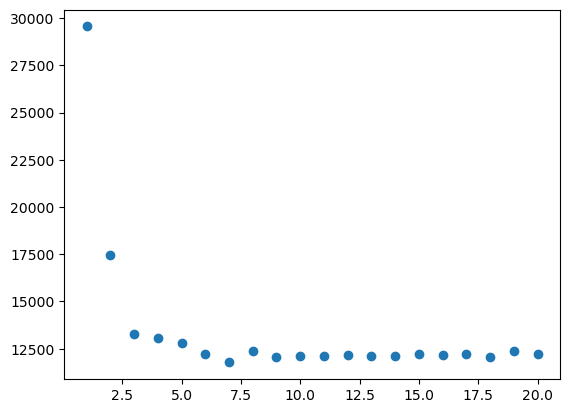

K = 1 MSE = 29556.417519908988
K = 2 MSE = 17440.759670079635
K = 3 MSE = 13266.01984578435
K = 4 MSE = 13062.795364050056
K = 5 MSE = 12786.786393629121
K = 6 MSE = 12243.019719378084
K = 7 MSE = 11771.018968679624
K = 8 MSE = 12396.985388225256
K = 9 MSE = 12034.794940940184
K = 10 MSE = 12118.78457337884
K = 11 MSE = 12128.965419005444
K = 12 MSE = 12181.80956895462
K = 13 MSE = 12130.30195690369
K = 14 MSE = 12099.949606463748
K = 15 MSE = 12204.420528378207
K = 16 MSE = 12193.205435864618
K = 17 MSE = 12221.438997602656
K = 18 MSE = 12077.48573715923
K = 19 MSE = 12362.92954408655
K = 20 MSE = 12215.84837883959


In [34]:
import matplotlib.pyplot as plt

plt.scatter(hyper_params, mse_values)
plt.show()

for k, mse in enumerate(mse_values):
    print(f'K = {k+1} MSE = {mse}')